<a href="https://colab.research.google.com/github/Yegeonhui/TIL/blob/main/tensorflow_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

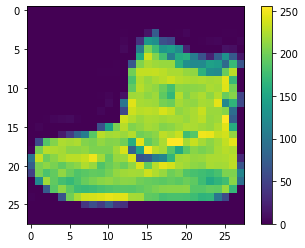

In [20]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()  
plt.grid(False)
plt.show()  

In [21]:
train_images = train_images / 255.0
test_images = test_images / 255.0 

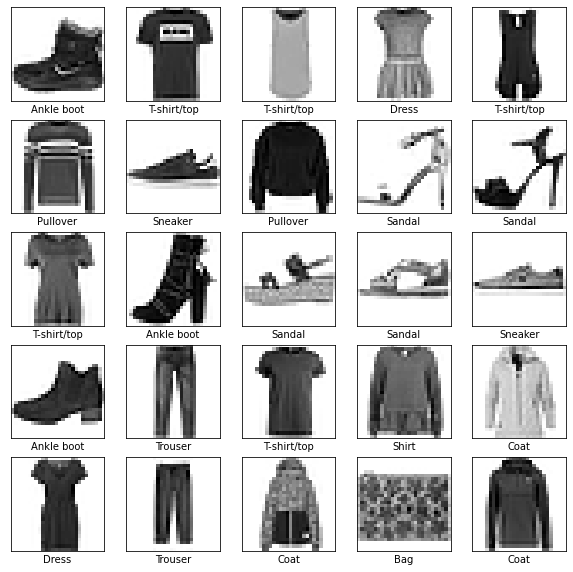

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [6]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])
model.compile(optimizer='adam', 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4977 - accuracy: 0.8244
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3743 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3118 - accuracy: 0.8846
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2938 - accuracy: 0.8914
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8963
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2678 - accuracy: 0.9006
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2490 - accuracy: 0.9061
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.239

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3405 - accuracy: 0.8777 - 839ms/epoch - 3ms/step

Test accuracy: 0.8776999711990356


In [8]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [9]:
print(predictions.shape)

(10000, 10)


In [10]:
predictions[0]

array([1.32869502e-06, 6.71221759e-11, 3.65368236e-10, 1.38031755e-08,
       3.84693041e-11, 1.59616314e-03, 7.07149297e-07, 2.12620590e-02,
       5.13972680e-07, 9.77139294e-01], dtype=float32)

In [11]:
np.argmax(predictions[0])

9

In [12]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

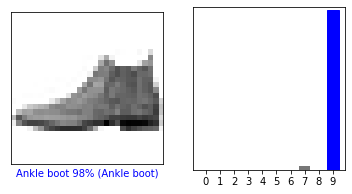

In [13]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

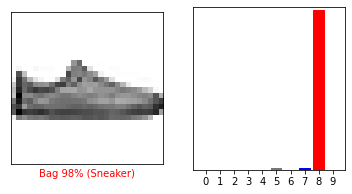

In [14]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

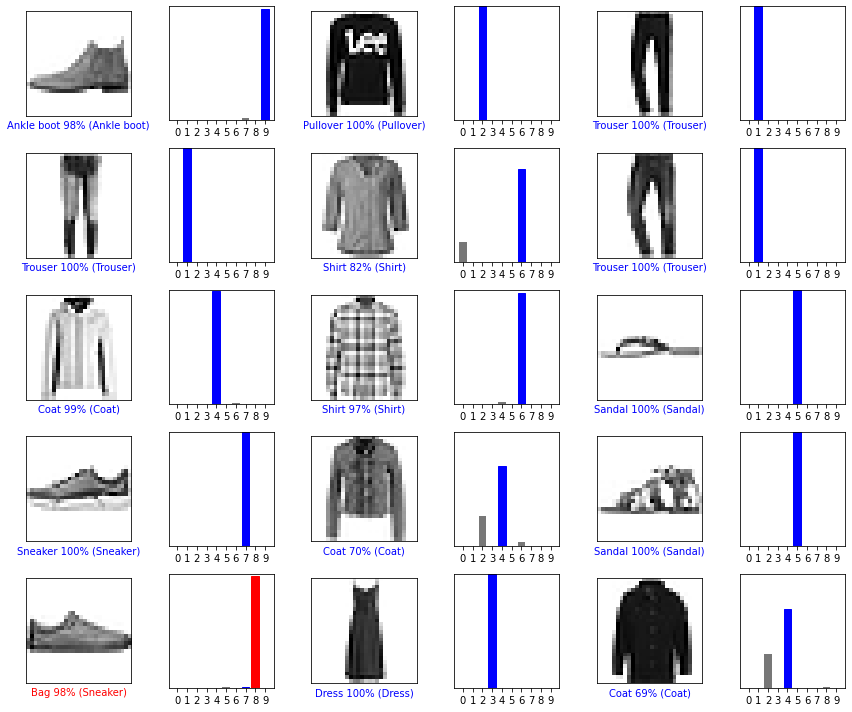

In [15]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [16]:
img = test_images[1]
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [18]:
predictions_single = probability_model.predict(img)
print(predictions_single)

[[8.1660932e-05 1.6576660e-13 9.9956554e-01 2.3759999e-14 3.2196593e-04
  2.0451540e-12 3.0899249e-05 1.9451623e-21 2.0864261e-12 6.8874176e-21]]


plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [21]:
np.argmax(predictions_single[0])

2